In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import entropy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None)
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
df['Bare Nuclei'] = df['Bare Nuclei'].astype('Int64')
df = df.replace('?',np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    Int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: Int64(1), int64(10)
memory usage: 64.7 KB


C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

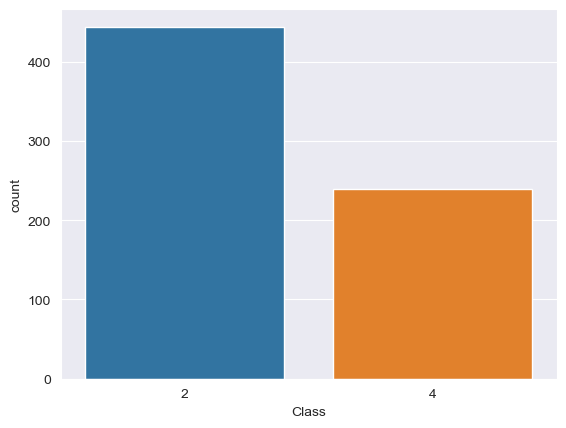

In [7]:
sns.countplot(df['Class'])

In [10]:
X = df.iloc[:, 1:-1]  # Features are columns 1 through 9
y = df['Class']       # Target variable is column 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Initialize classifiers
svc = SVC()
rfc = RandomForestClassifier()
mlp = MLPClassifier()
knn = KNeighborsClassifier()

In [13]:
# Train classifiers on training data
mlp = MLPClassifier(max_iter=1000)

svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
mlp.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Predict using trained classifiers on testing data
svc_preds = svc.predict(X_test)
rfc_preds = rfc.predict(X_test)
mlp_preds = mlp.predict(X_test)
knn_preds = knn.predict(X_test)


C:\Users\angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
# Calculate accuracy scores
svc_acc = accuracy_score(y_test, svc_preds)
rfc_acc = accuracy_score(y_test, rfc_preds)
mlp_acc = accuracy_score(y_test, mlp_preds)
knn_acc = accuracy_score(y_test, knn_preds)

In [16]:
# Print accuracy scores
print('SVC Accuracy: {:.2f}%'.format(svc_acc * 100))
print('RFC Accuracy: {:.2f}%'.format(rfc_acc * 100))
print('MLP Accuracy: {:.2f}%'.format(mlp_acc * 100))
print('KNN Accuracy: {:.2f}%'.format(knn_acc * 100))


SVC Accuracy: 95.12%
RFC Accuracy: 95.61%
MLP Accuracy: 95.12%
KNN Accuracy: 95.61%
